In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk 
import statsmodels.api as stats

In [2]:
df = pd.read_csv('clean_movie_data.csv')

In [3]:
df.head()

,budget,imdb_id,release_date,revenue,title,month,year,rating,season,genre,profitability
0,356000000.0,tt4154796,2019-04-24,2.797801e+09,Avengers: Endgame,4,2019,PG-13,Spring,Adventure,2.441801e+09
1,300000000.0,tt4154756,2018-04-25,2.046240e+09,Avengers: Infinity War,4,2018,PG-13,Spring,Adventure,1.746240e+09
2,150000000.0,tt0369610,2015-06-06,1.671713e+09,Jurassic World,6,2015,PG-13,Summer,Action,1.521713e+09
3,260000000.0,tt6105098,2019-07-12,1.656943e+09,The Lion King,7,2019,PG,Summer,Adventure,1.396943e+09
4,220000000.0,tt0848228,2012-04-25,1.519558e+09,The Avengers,4,2012,PG-13,Spring,Science Fiction,1.299558e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   budget         1895 non-null   float64
 1   imdb_id        1895 non-null   object 
 2   release_date   1895 non-null   object 
 3   revenue        1895 non-null   float64
 4   title          1895 non-null   object 
 5   month          1895 non-null   int64  
 6   year           1895 non-null   int64  
 7   rating         1895 non-null   object 
 8   season         1895 non-null   object 
 9   genre          1882 non-null   object 
 10  profitability  1895 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 163.0+ KB


In [5]:
df.dropna(axis=0, inplace=True, how='any')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 0 to 1894
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   budget         1882 non-null   float64
 1   imdb_id        1882 non-null   object 
 2   release_date   1882 non-null   object 
 3   revenue        1882 non-null   float64
 4   title          1882 non-null   object 
 5   month          1882 non-null   int64  
 6   year           1882 non-null   int64  
 7   rating         1882 non-null   object 
 8   season         1882 non-null   object 
 9   genre          1882 non-null   object 
 10  profitability  1882 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 176.4+ KB


In [7]:
new_df = df.drop(['imdb_id', 'title', 'release_date'], axis = 1)

In [8]:
new_df.head()

,budget,revenue,month,year,rating,season,genre,profitability
0,356000000.0,2.797801e+09,4,2019,PG-13,Spring,Adventure,2.441801e+09
1,300000000.0,2.046240e+09,4,2018,PG-13,Spring,Adventure,1.746240e+09
2,150000000.0,1.671713e+09,6,2015,PG-13,Summer,Action,1.521713e+09
3,260000000.0,1.656943e+09,7,2019,PG,Summer,Adventure,1.396943e+09
4,220000000.0,1.519558e+09,4,2012,PG-13,Spring,Science Fiction,1.299558e+09


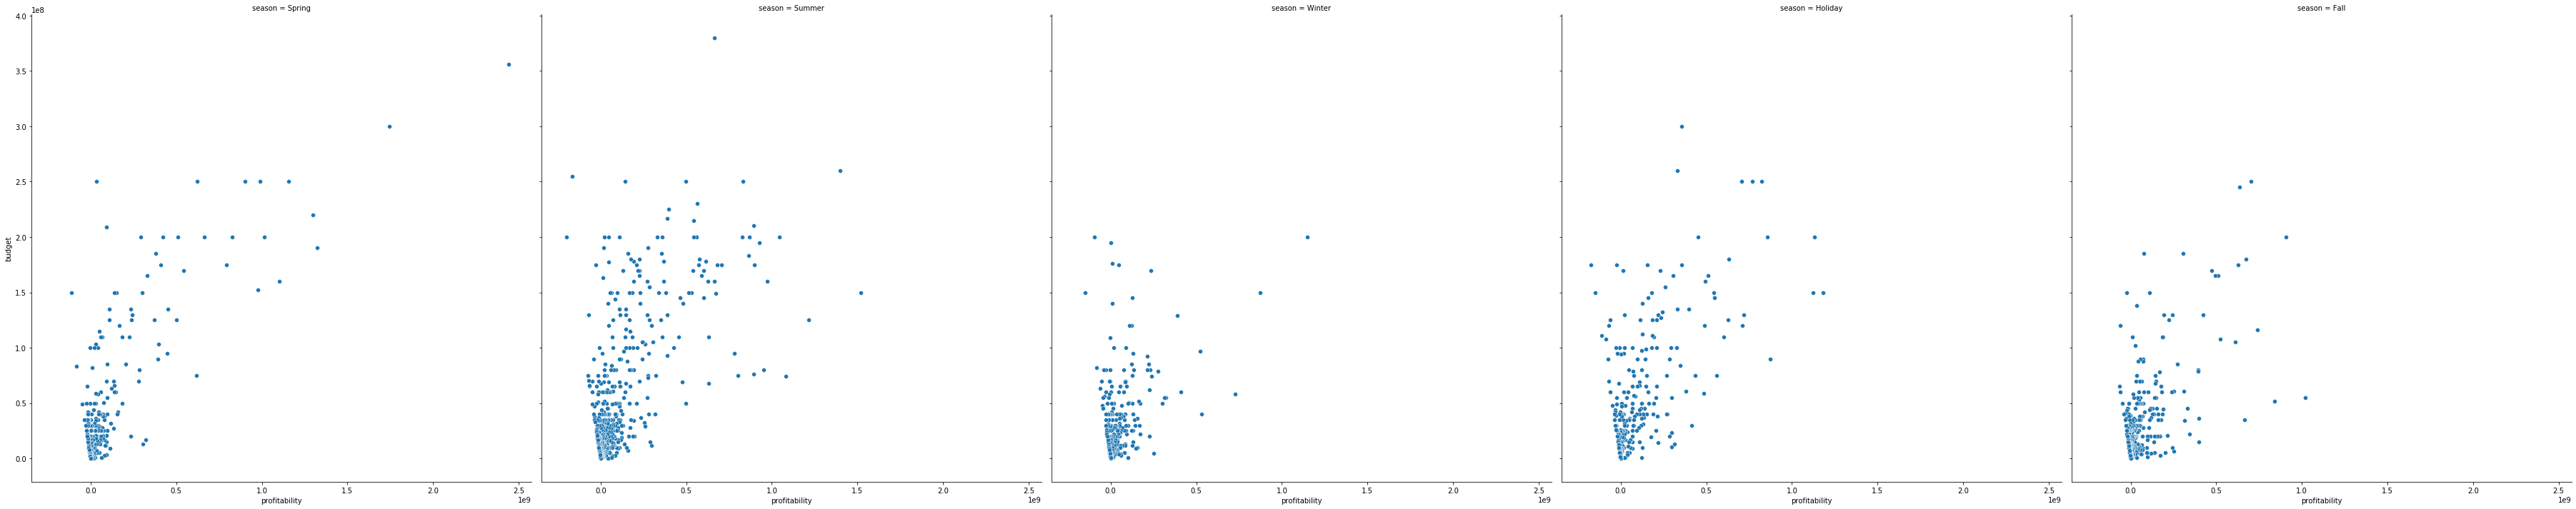

In [9]:
sns.relplot(x="profitability", y="budget",
            col="season", data=new_df, height=10);

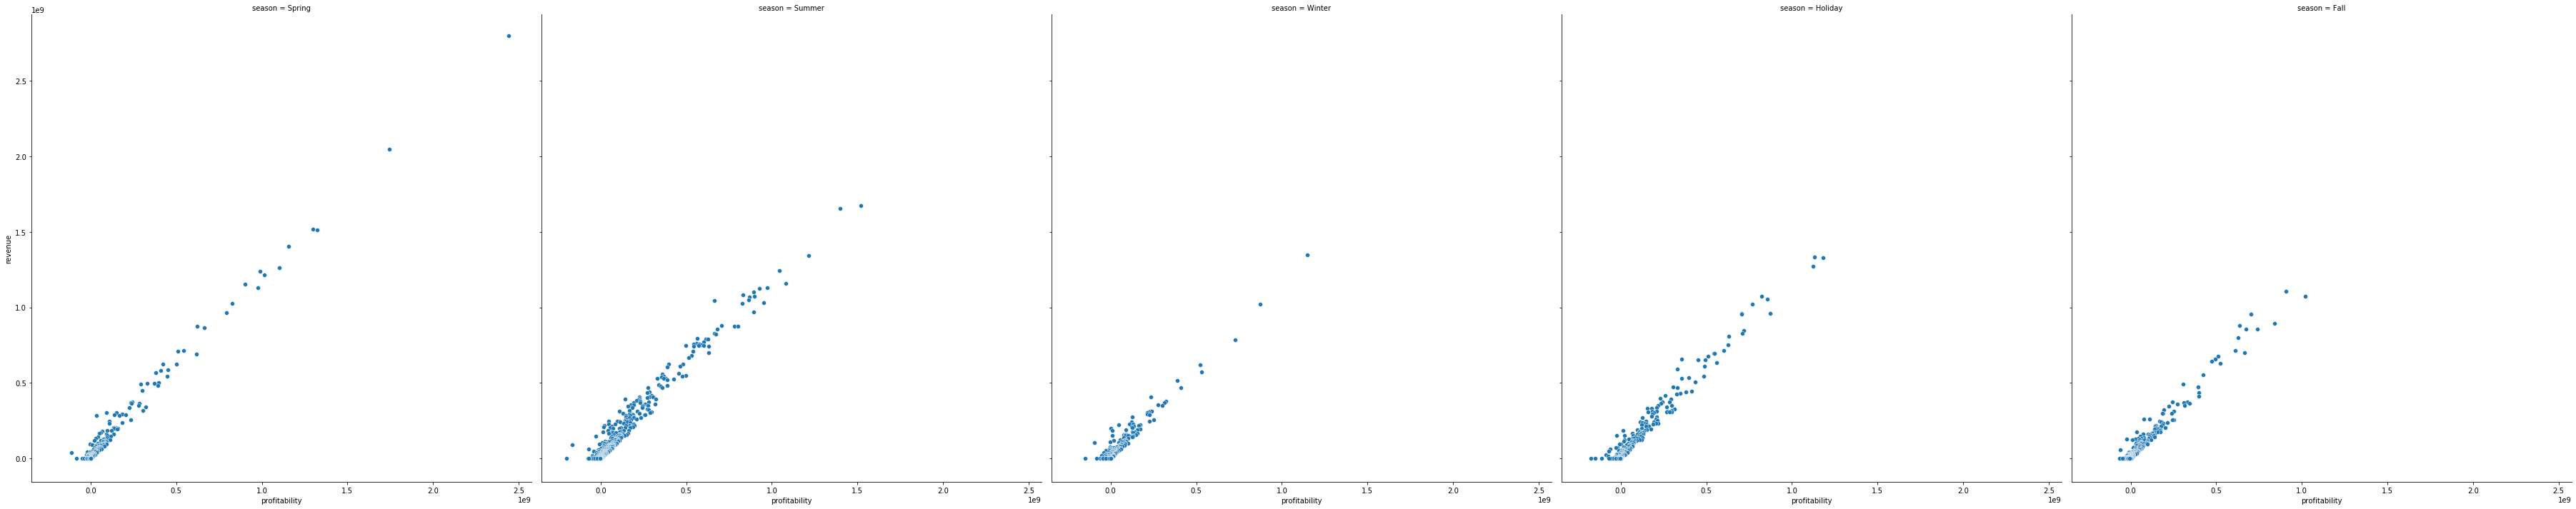

In [10]:
sns.relplot(x="profitability", y="revenue",
            col="season", data=new_df, height=10);

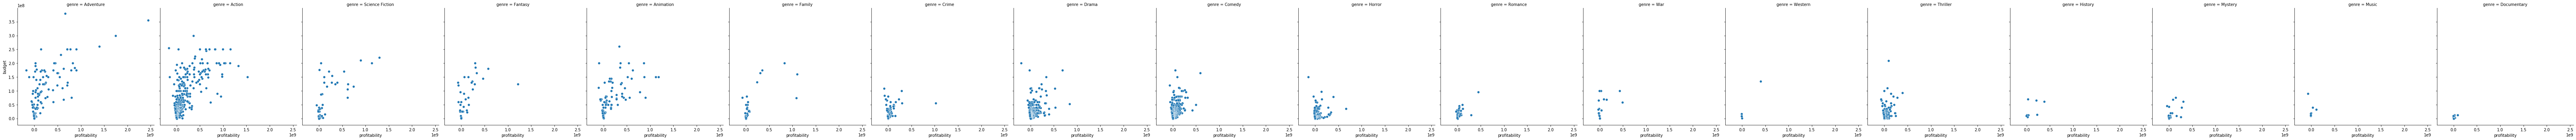

In [11]:
sns.relplot(x="profitability", y="budget",
            col="genre", data=new_df, height=5);

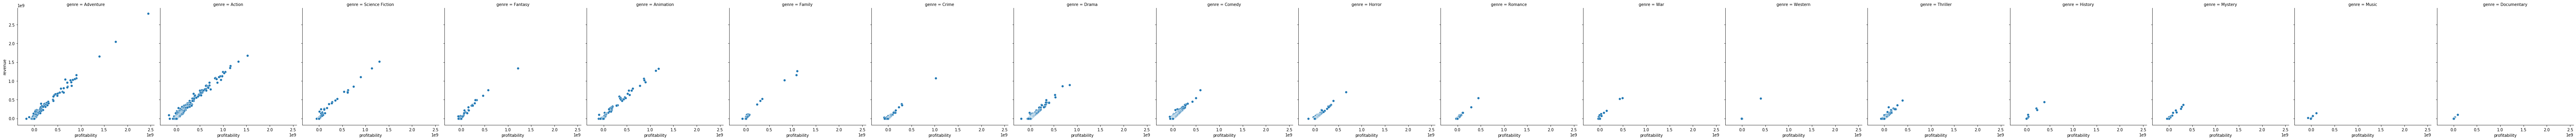

In [12]:
sns.relplot(x="profitability", y="revenue",
            col="genre", data=new_df, height=5);

In [13]:
cat_df = new_df.drop(['budget', 'revenue', 'month', 'year', 'profitability'], axis =1)
num_df = new_df.drop(['rating', 'season', 'genre', 'profitability'], axis =1)

In [14]:
cat_df.head()

,rating,season,genre
0,PG-13,Spring,Adventure
1,PG-13,Spring,Adventure
2,PG-13,Summer,Action
3,PG,Summer,Adventure
4,PG-13,Spring,Science Fiction


In [15]:
dumb_df = pd.get_dummies(cat_df, prefix=['rating', 'season', 'genre'], drop_first=True)

In [16]:
dumb_df.head()

,rating_PG,rating_PG-13,rating_R,season_Holiday,season_Spring,season_Summer,season_Winter,genre_Adventure,genre_Animation,genre_Comedy,...,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_Thriller,genre_War,genre_Western
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
dumb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 0 to 1894
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   rating_PG              1882 non-null   uint8
 1   rating_PG-13           1882 non-null   uint8
 2   rating_R               1882 non-null   uint8
 3   season_Holiday         1882 non-null   uint8
 4   season_Spring          1882 non-null   uint8
 5   season_Summer          1882 non-null   uint8
 6   season_Winter          1882 non-null   uint8
 7   genre_Adventure        1882 non-null   uint8
 8   genre_Animation        1882 non-null   uint8
 9   genre_Comedy           1882 non-null   uint8
 10  genre_Crime            1882 non-null   uint8
 11  genre_Documentary      1882 non-null   uint8
 12  genre_Drama            1882 non-null   uint8
 13  genre_Family           1882 non-null   uint8
 14  genre_Fantasy          1882 non-null   uint8
 15  genre_History          1882 non-null  

In [18]:
from sklearn import preprocessing

In [19]:
num_df.head()

,budget,revenue,month,year
0,356000000.0,2.797801e+09,4,2019
1,300000000.0,2.046240e+09,4,2018
2,150000000.0,1.671713e+09,6,2015
3,260000000.0,1.656943e+09,7,2019
4,220000000.0,1.519558e+09,4,2012


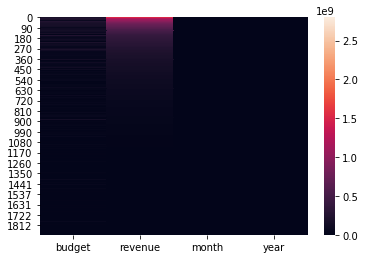

In [20]:
sns.heatmap(num_df);

In [21]:
features = pd.concat([num_df, dumb_df], axis=1)

In [22]:
features.head()

,budget,revenue,month,year,rating_PG,rating_PG-13,rating_R,season_Holiday,season_Spring,season_Summer,...,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_Thriller,genre_War,genre_Western
0,356000000.0,2.797801e+09,4,2019,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,300000000.0,2.046240e+09,4,2018,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,150000000.0,1.671713e+09,6,2015,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,260000000.0,1.656943e+09,7,2019,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,220000000.0,1.519558e+09,4,2012,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
from sklearn import preprocessing
# Get column names first
names = features.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [24]:
scaled_df.head()

,budget,revenue,month,year,rating_PG,rating_PG-13,rating_R,season_Holiday,season_Spring,season_Summer,...,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_Thriller,genre_War,genre_Western
0,5.877580,11.196336,-0.775331,1.811340,-0.416313,1.337217,-0.949216,-0.431144,2.291832,-0.658300,...,-0.141613,-0.065337,-0.299585,-0.061101,-0.111231,-0.141613,-0.160041,-0.274643,-0.095474,-0.051612
1,4.833409,8.047263,-0.775331,1.453258,-0.416313,1.337217,-0.949216,-0.431144,2.291832,-0.658300,...,-0.141613,-0.065337,-0.299585,-0.061101,-0.111231,-0.141613,-0.160041,-0.274643,-0.095474,-0.051612
2,2.036521,6.477982,-0.195949,0.379012,-0.416313,1.337217,-0.949216,-0.431144,-0.436332,1.519065,...,-0.141613,-0.065337,-0.299585,-0.061101,-0.111231,-0.141613,-0.160041,-0.274643,-0.095474,-0.051612
3,4.087572,6.416096,0.093742,1.811340,2.402038,-0.747822,-0.949216,-0.431144,-0.436332,1.519065,...,-0.141613,-0.065337,-0.299585,-0.061101,-0.111231,-0.141613,-0.160041,-0.274643,-0.095474,-0.051612
4,3.341735,5.840445,-0.775331,-0.695235,-0.416313,1.337217,-0.949216,-0.431144,2.291832,-0.658300,...,-0.141613,-0.065337,-0.299585,-0.061101,-0.111231,-0.141613,6.248404,-0.274643,-0.095474,-0.051612


In [25]:
target = new_df['profitability']

In [27]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(features.drop(['budget', 'year'], axis=1), target, test_size=0.33, random_state=0)

In [60]:
mod = stats.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          profitability   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              2267.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:52:33   Log-Likelihood:                         -23466.
No. Observations:                1260   AIC:                                  4.698e+04
Df Residuals:                    1234   BIC:                                  4.712e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [62]:
y_pred = reg.predict(X_test)

In [63]:
y_pred

array([ 3.27620749e+07,  5.60520007e+08,  6.43913626e+07,  4.46506360e+08,
       -5.33531219e+06,  2.03102339e+08, -1.41257526e+07,  2.90139172e+08,
        1.32893044e+07, -1.95438824e+07,  6.43193809e+08,  5.35661354e+08,
       -5.19709272e+06,  9.68420195e+07,  9.12637115e+08,  8.06755303e+07,
        8.42021975e+07,  1.84410122e+08, -1.81677627e+07, -9.98917477e+06,
        2.76597291e+08, -6.68975850e+06, -4.76651188e+05, -1.37466132e+07,
        5.59285774e+08,  1.28868560e+08,  4.16067128e+07,  1.52045580e+07,
       -3.61788278e+07,  3.69806876e+07,  2.62430552e+08,  4.70391650e+07,
        9.40532226e+07,  2.30710466e+06,  8.50949429e+05, -1.81967872e+07,
       -8.37218084e+04,  6.25657540e+07,  2.36708525e+08, -3.57014309e+07,
        1.15332915e+09, -1.19920222e+07,  3.51553915e+08, -1.74795239e+07,
       -3.70445499e+07, -2.06072050e+07, -2.83412930e+07, -2.21614158e+07,
       -1.26345420e+07,  6.84614827e+07,  8.50949429e+05,  2.00156783e+07,
        2.83006856e+07, -

In [29]:
x_train_names = X_train.columns
# Create the Scaler object
x_train_scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
x_train_scaled = x_train_scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(x_train_scaled, columns=names)

AttributeError: 'Series' object has no attribute 'columns'

ValueError: x and y must be the same size

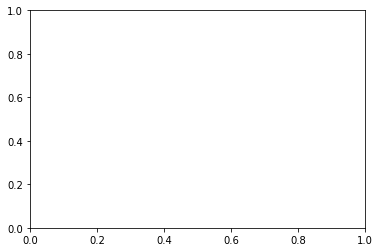

In [56]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, reg.predict(X_train), color = 'red')
plt.title('Budget vs Revenue (Training set)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression

In [61]:
reg = LinearRegression()

reg.fit(X_train, y_train)

print(reg.score(X_train, y_train))

print(reg.coef_)

print(reg.intercept_)

0.9761540166282934
[ 8.51197490e-01  2.11608084e+06 -1.00471851e+07 -1.62933528e+07
  9.78450855e+05 -1.46640666e+07  1.36339908e+07  1.49161835e+06
  1.60488168e+07 -6.01647542e+06  9.13925704e+06  2.29187973e+07
  1.61268387e+07  3.87518981e+07  2.65260887e+07  2.04232048e+07
  8.65722073e+05  3.15396257e+07  2.79822440e+07  3.23582158e+07
  2.47675485e+07  3.13515221e+07  5.24405702e+06  2.08299094e+07
  9.01156053e+06  1.78027580e+07]
-48751904.280718
